**Ensuring plot visibility in notebook environment.**

In [1]:
%matplotlib inline

**Relevant imports.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data, wb
from datetime import datetime
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import __version__
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline() 

/srv/conda/envs/notebook/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


**Fetch stock info for the following banks from Google Finance:
Bank of America,
CitiGroup,
Goldman Sachs,
JPMorgan Chase,
Morgan Stanley,
Wells Fargo.
Fetch the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol.**

In [3]:
#start = datetime(2006,1,1)
#end = datetime(2016,1,1)
#BAC = data.DataReader('BAC','google',start,end)
#C = data.DataReader('C','google',start,end)
#GS = data.DataReader('GS','google',start,end)
#JPM = data.DataReader('JPM','google',start,end)
#MS = data.DataReader('MS','google',start,end)
#WFC = data.DataReader('WFC','google',start,end)
#bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],key='BAC,C,GS,JPM,MS,WFC'.split(','))
# Above is the generalised process to fetch data from google finance for the reqd banks but that is not working so fetching the data from a pickle file
bank_stocks = pd.read_pickle('all_banks')
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

**Calculate the maximum closing stock price for each bank over the entire period for which we are having the dataset.**

In [4]:
tickers = 'BAC C GS JPM MS WFC'.split()
tickers_dict = {'BAC':'Bank of America','C':'Citi Group','GS':'Goldman Sachs','JPM':'JP Morgan','MS' :'Morgan Stanley','WFC':'Wells Fargo'}
for bank in tickers:
  print("{} :".format(bank),bank_stocks['{}'.format(bank)].max()['Close'])

BAC : 54.9
C : 564.1
GS : 247.92
JPM : 70.08
MS : 89.3
WFC : 58.52


In [5]:
"""
Alternate of above soln in a flavor of pandas. 
"""
bank_stocks.xs('Close',axis=1,level=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Need to calculate the stock returns for each bank with the formula:
(p(t)-p(t-1))/p(t-1)**

In [6]:
bank_stocks_close = bank_stocks.xs('Close',axis=1,level=1)
stock_returns = pd.DataFrame()
for bank in tickers:
  stock_returns['{}_return'.format(bank)]=bank_stocks_close['{}'.format(bank)].pct_change()
stock_returns.columns.names=['Bank Ticker']
stock_returns.head()

Bank Ticker,BAC_return,C_return,GS_return,JPM_return,MS_return,WFC_return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**Create a pairplot using seaborn for the stock_returns dataframe.**

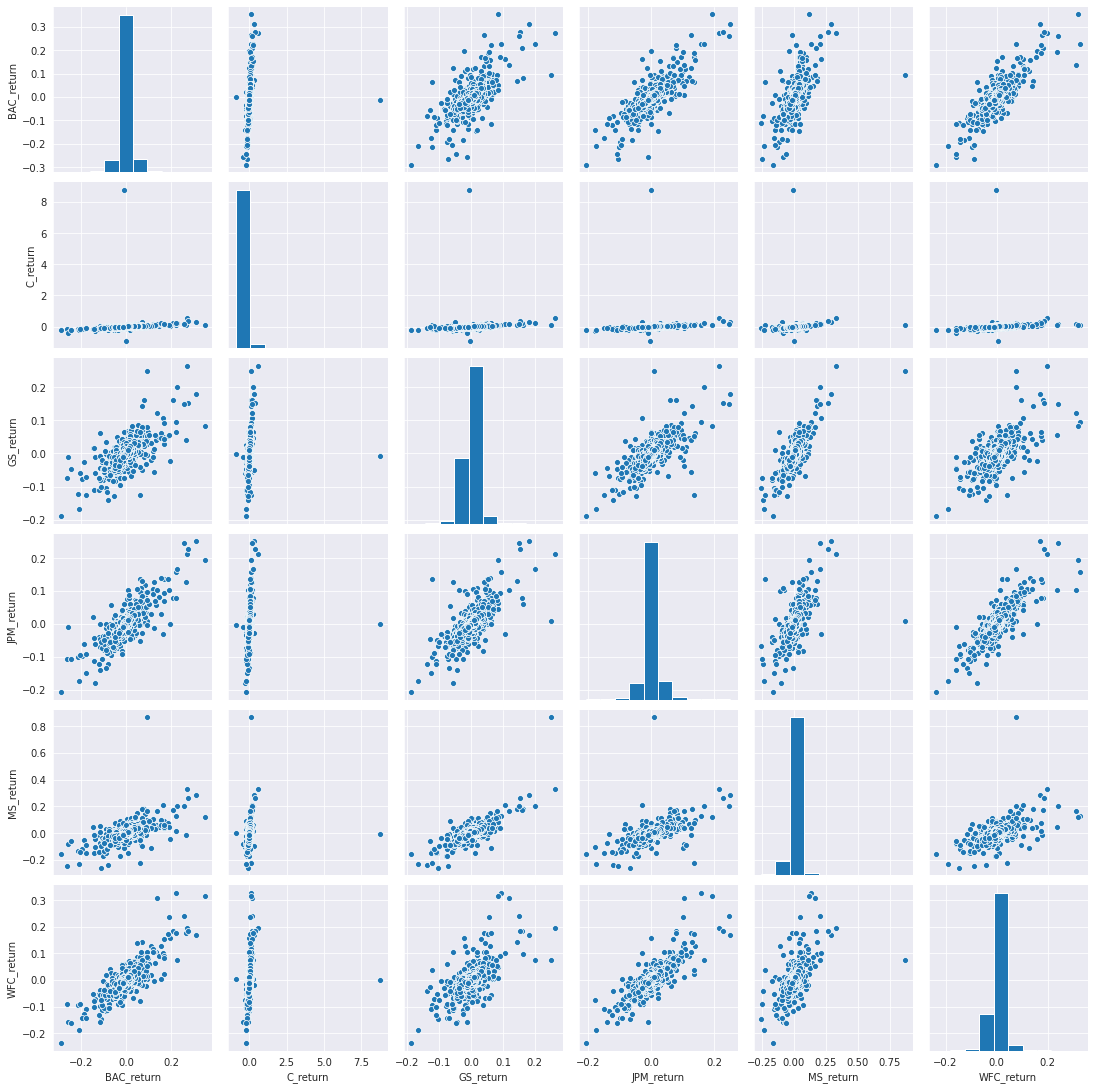

In [7]:
sns.set_style('darkgrid')
sns.pairplot(stock_returns)

**Using the stock returns figure out the day upon which each bank had the best returns.**

In [8]:
print(stock_returns.idxmax())

Bank Ticker
BAC_return   2009-04-09
C_return     2011-05-09
GS_return    2008-11-24
JPM_return   2009-01-21
MS_return    2008-10-13
WFC_return   2008-07-16
dtype: datetime64[ns]


**Using the stock returns figure out the day upon which each bank had the worst returns.**

In [9]:
print(stock_returns.idxmin())

Bank Ticker
BAC_return   2009-01-20
C_return     2011-05-06
GS_return    2009-01-20
JPM_return   2009-01-20
MS_return    2008-10-09
WFC_return   2009-01-20
dtype: datetime64[ns]


**Compute the standard deviation of returns of each bank and then based upon the results figure out which bank stock was the riskiest to invest over the entire period.**

In [10]:
print(stock_returns.std())
print('\n')
print("Riskiest bank stock to invest: {}".format(tickers_dict.get(stock_returns.std().idxmax().split('_')[0])))

Bank Ticker
BAC_return    0.036650
C_return      0.179969
GS_return     0.025346
JPM_return    0.027656
MS_return     0.037820
WFC_return    0.030233
dtype: float64


Riskiest bank stock to invest: Citi Group


**Compute the standard deviation of returns of each bank and then based upon the results figure out which bank stock was the riskiest to invest in 2015.**

In [11]:
stock_returns.reset_index(inplace=True)
stock_returns.head() 

Bank Ticker,Date,BAC_return,C_return,GS_return,JPM_return,MS_return,WFC_return
0,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2,2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
3,2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
4,2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [12]:
stock_returns['Year']=stock_returns['Date'].apply(lambda date:date.year)
print("Riskiest bank stock to invest in 2015: {}".format(tickers_dict.get(stock_returns[stock_returns['Year']==2015].std().idxmax().split('_')[0])))
stock_returns.set_index('Date',inplace=True)
del stock_returns['Year']
# Alternate of above
# stock_returns.loc['2015-01-01':'2015-12-31'].std().idmax()

Riskiest bank stock to invest in 2015: Morgan Stanley


**Create a distplot of the 2015 returns for Morgan Stanley.**

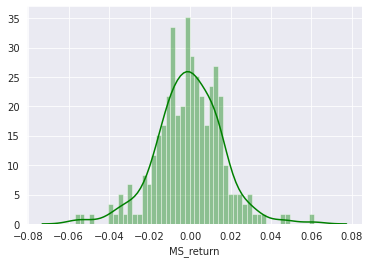

In [13]:
sns.distplot(stock_returns.loc['2015-01-01':'2015-12-31','MS_return'],color='green',bins=50)

**Create a distplot of the 2008 returns for Citi Group.**

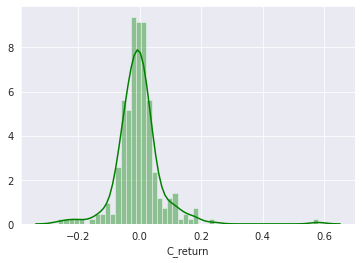

In [14]:
sns.distplot(stock_returns.loc['2008-01-01':'2008-12-31','C_return'],color='green',bins=50)

**Create a line plot for Closing stock price of each bank over the entire period.**

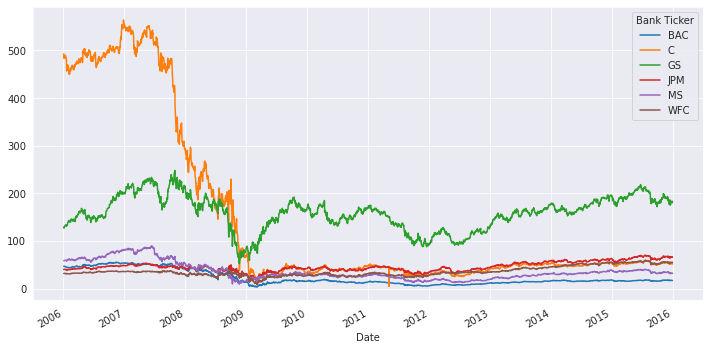

In [15]:
bank_stocks.xs('Close',axis=1,level=1).plot(figsize=(12,6))

**Create interactive plot for the same problem statement above.**

In [16]:
bank_stocks.xs('Close',axis=1,level=1).iplot()

**Plot the Rolling 30 day average for BAC(Bank of America's Corp.) in the year 2008 against the close price for BAC's in the year 2008.**

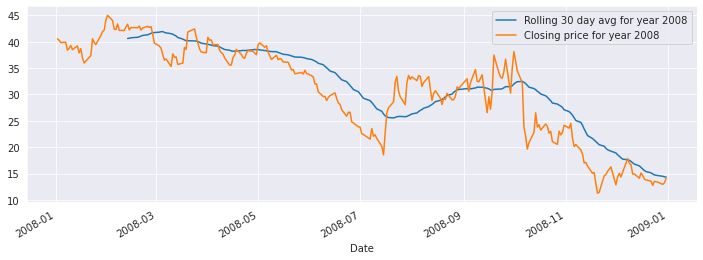

In [17]:
bank_stocks_BAC=bank_stocks['BAC']
plt.figure(figsize=(12,4))
bank_stocks_BAC.loc['2008-01-01':'2008-12-31']['Close'].rolling(window=30).mean().plot(label='Rolling 30 day avg for year 2008')
bank_stocks_BAC.loc['2008-01-01':'2008-12-31']['Close'].plot(label='Closing price for year 2008')
plt.legend()

**Plot the heatmap for the correlation of the closing prices of the banks.**

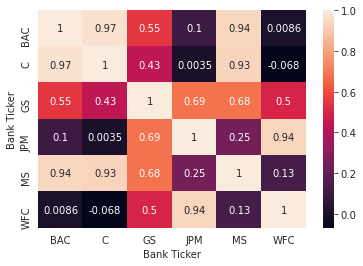

In [18]:
bank_stocks_close_corr=bank_stocks.xs('Close',axis=1,level=1).corr()
sns.heatmap(bank_stocks_close_corr,annot=True)

**Use seaborn's cluster map to cluster the correlations together.**

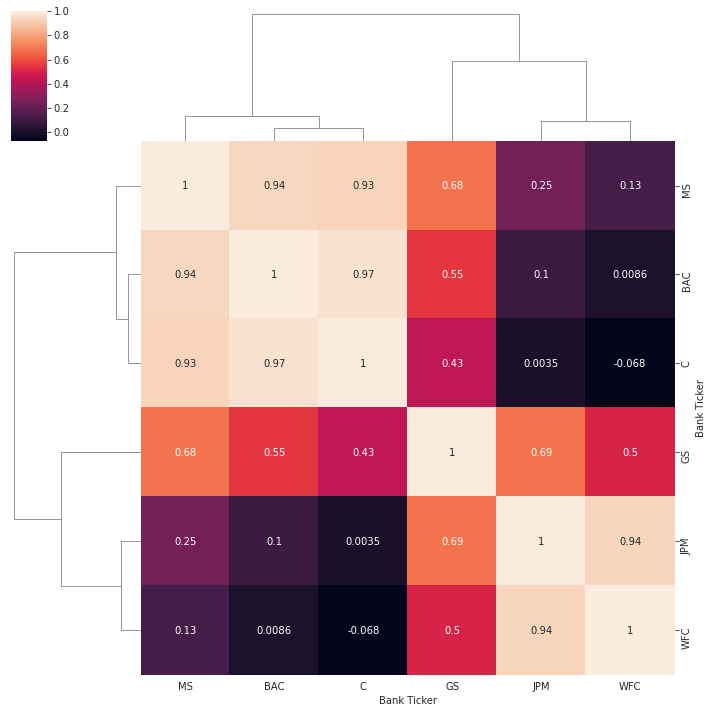

In [19]:
sns.clustermap(bank_stocks_close_corr,annot=True)

**Plot interactive seaborn's clustermap.**

In [20]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

**Create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016 using plotly and cufflinks.**

In [21]:
bank_stocks['BAC'][['Open', 'High', 'Low', 'Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Create a Simple Moving Averages plot of Morgan Stanley for the year 2015 using plotly snd cufflinks.**

In [22]:
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Create a Bollinger Band Plot for Bank of America for the year 2015 using plotly and cufflinks.**

In [23]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')